# Task 3: Geospatial Analysis

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
file_path = (r'C:\Users\Rony\Downloads\Dataset .csv')
data = pd.read_csv(file_path)

In [135]:
# Display the first few rows of the dataset
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [131]:
# Filter necessary columns for visualization
location_data = data[['Latitude', 'Longitude', 'City', 'Aggregate rating']].dropna()

# Create a base map centered around a general location
map_center = [data["Latitude"].mean(), data["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=2)

# Create a marker cluster
map_restaurants = MarkerCluster().add_to(restaurant_map)

# Add markers for each restaurant
for _, row in data.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['Restaurant Name']} {row['Aggregate rating']}",
        tooltip=row["Restaurant Name"]
    ).add_to(map_restaurants)

# Save and display the map
map_path = r'C:\DATASCIENCE\RonyProject\Cognifyz task\map.html'
map_restaurants.save(map_path)

# Display the map path
print(f"The map has been saved to: {map_path}")



The map has been saved to: C:\DATASCIENCE\RonyProject\Cognifyz task\map.html


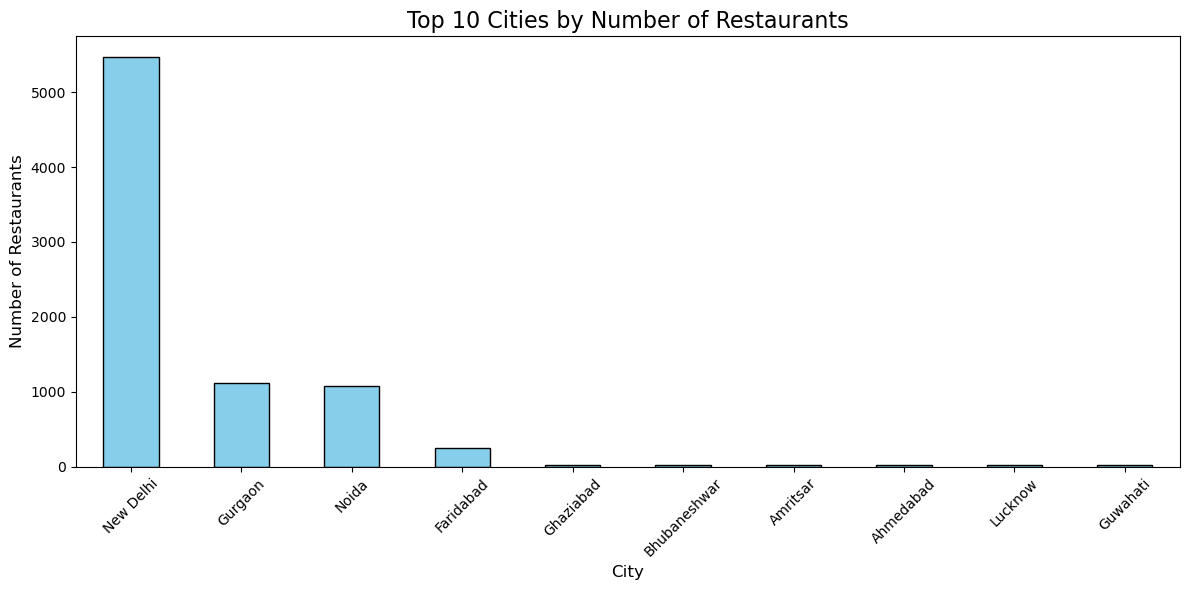

'/mnt/data/city_distribution_plot.png'

In [132]:
# Count the number of restaurants in each city
city_distribution = data['City'].value_counts().head(10)  # Top 10 cities by number of restaurants

# Plot the distribution
plt.figure(figsize=(12, 6))
city_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Cities by Number of Restaurants', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plot_file_path = '/mnt/data/city_distribution_plot.png'
plt.show()

plot_file_path


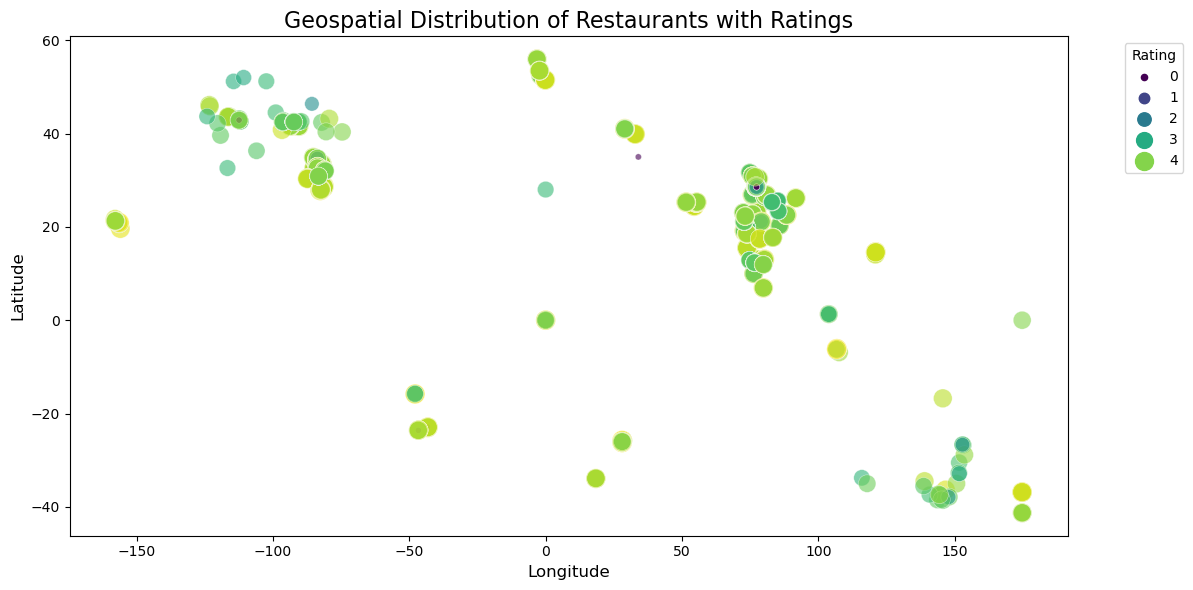

In [133]:
# Scatter plot to analyze the relationship between latitude, longitude, and aggregate rating
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x="Longitude",
    y="Latitude",
    hue="Aggregate rating",
    palette="viridis",
    size="Aggregate rating",
    sizes=(20, 200),
    alpha=0.6
)

plt.title('Geospatial Distribution of Restaurants with Ratings', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



I am glad to report that I successfully completed Level 1,
Task 3: Geospatial Analysis as part of my internship at Cognifyz Technologies.
This work allowed me to display restaurant locations on maps, evaluate distribution trends, and investigate relationships with ratings using basic geospatial tools.
Creating practical insights into data's spatial aspects has been a pleasant experience.

